# [머신러닝의 해석] 4편. feature의 평균 영향을 볼 때 유용한 Partial Dependence Plot (PDP)

사용한 데이터: [Adult Census Income](https://www.kaggle.com/uciml/adult-census-income) data


데이터 전처리는 [이곳](https://github.com/Soohee410/Interpretable-Machine-Learning/blob/master/%5B%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%EC%9D%98%20%ED%95%B4%EC%84%9D%5D%20Adult%20Census%20income%20%EB%8D%B0%EC%9D%B4%ED%84%B0%20%EC%A0%84%EC%B2%98%EB%A6%AC.ipynb) 에 있습니다.

---

## Catboost 적용 및 Feature Importance

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import plot_partial_dependence, partial_dependence

sns.set_style('whitegrid')
matplotlib.rcParams['figure.dpi'] = 100

In [3]:
df = pd.read_csv("adult_new.csv")
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,82,Private,132870,HS-grad,2,Separate,Exec-managerial,Not-in-family,White,Female,0,4356,18,US,<=50K
1,54,Private,140359,HS-under,1,Separate,Machine-op-inspct,Unmarried,White,Female,0,3900,40,US,<=50K
2,41,Private,264663,College,3,Separate,Prof-specialty,Own-child,White,Female,0,3900,40,US,<=50K
3,34,Private,216864,HS-grad,2,Separate,Other-service,Unmarried,White,Female,0,3770,45,US,<=50K
4,38,Private,150601,HS-under,1,Separate,Adm-clerical,Unmarried,White,Male,0,3770,40,US,<=50K


In [7]:
y = df.income
X = df.drop(['income','fnlwgt','education'],axis=1)

#categorical features labeling
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

for i in ['workclass','marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']:
    X[i] = le.fit_transform(X[i])

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3, random_state=123, stratify=y)

In [17]:
from catboost import CatBoostClassifier
from sklearn import metrics

cb = CatBoostClassifier(silent=True, random_state=0, n_estimators=300).fit(X_train, y_train)
print('train set accuracy:', metrics.accuracy_score(y_train, cb.predict(X_train)))
print('test set accuracy:', metrics.accuracy_score(y_test, cb.predict(X_test)))

train set accuracy: 0.8953364021016413
test set accuracy: 0.8685181167281406


---

## (1) Marital.status

In [153]:
feature_name = 'marital.status'
feature_info = pd.concat([df[feature_name], X[feature_name]],axis=1).drop_duplicates()
feature_info.columns = ['category','label']
feature_info = feature_info.sort_values('label').reset_index(drop=True)
feature_info

,category,label
0,Married,0
1,Never married,1
2,Separate,2


In [154]:
pdp, axes = partial_dependence(cb, X_train, [3])
print(pdp)
print(axes)

[[0.340909   0.12525914 0.13330783]]
[array([0, 1, 2], dtype=int64)]


<IPython.core.display.Javascript object>


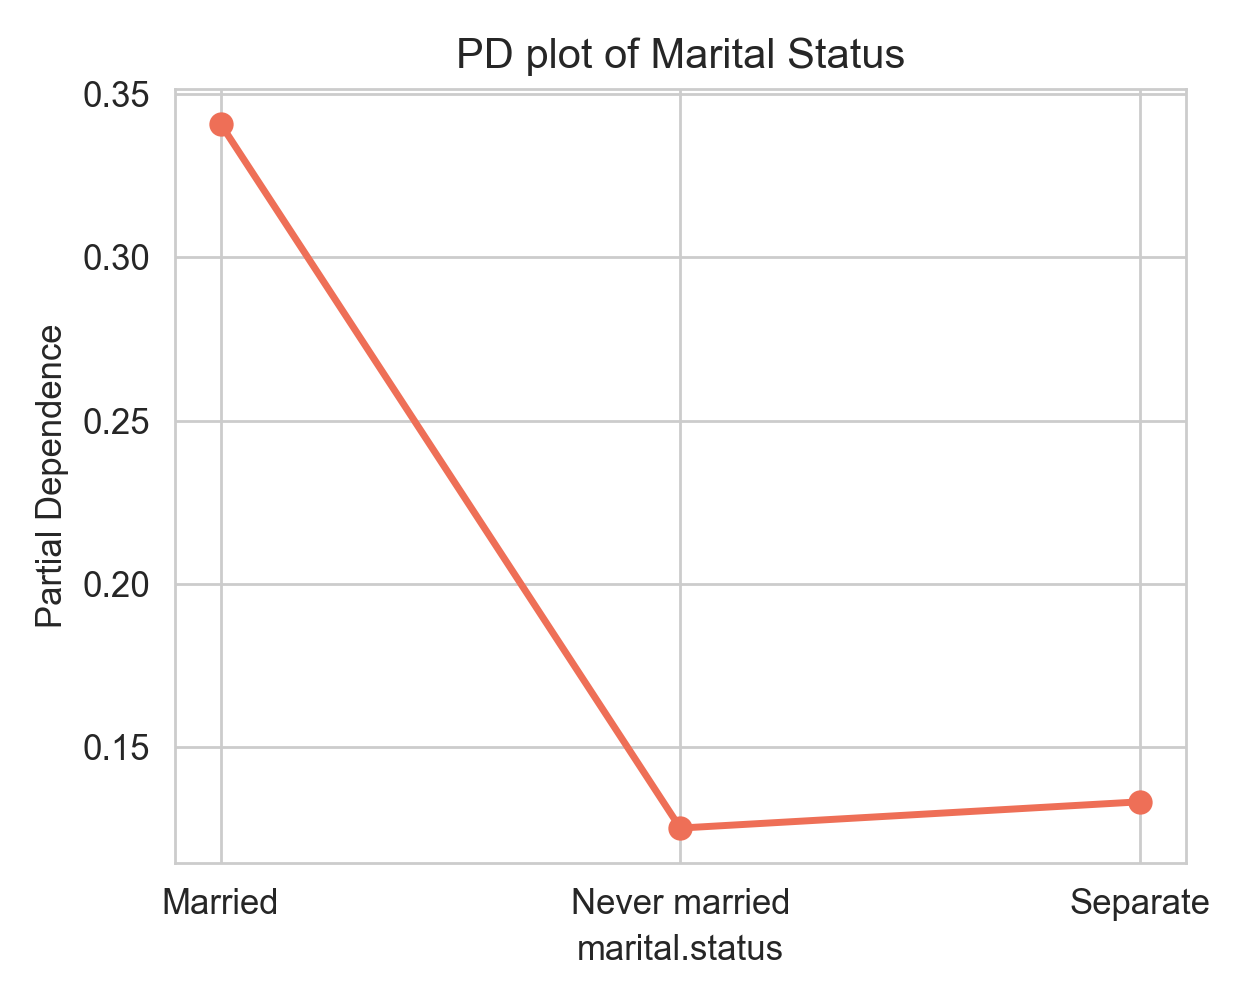

In [155]:
x = feature_info['category']
prob = list(pdp[0])

plt.subplots(figsize=(5,4))
plt.plot(x, prob, linewidth=2, marker='o', color='#ee6f57')
plt.title('PD plot of Marital Status')
plt.ylabel('Partial Dependence')
plt.xlabel('marital.status')
plt.tight_layout()

## (2) Education.num

In [156]:
feature_info = pd.concat([df['education'], df['education.num']],axis=1).drop_duplicates()
feature_info.columns = ['category','label']
feature_info = feature_info.sort_values('label').reset_index(drop=True)
feature_info

,category,label
0,HS-under,1
1,HS-grad,2
2,College,3
3,Associate,4
4,Bachelor,5
5,Master,6
6,Doctorate,7


In [157]:
pdp, axes = partial_dependence(cb, X_train, [2])
print(pdp)
print(axes)

[[0.13673256 0.20482029 0.23787394 0.25014513 0.31634243 0.35674992
  0.41183508]]
[array([1, 2, 3, 4, 5, 6, 7], dtype=int64)]


<IPython.core.display.Javascript object>


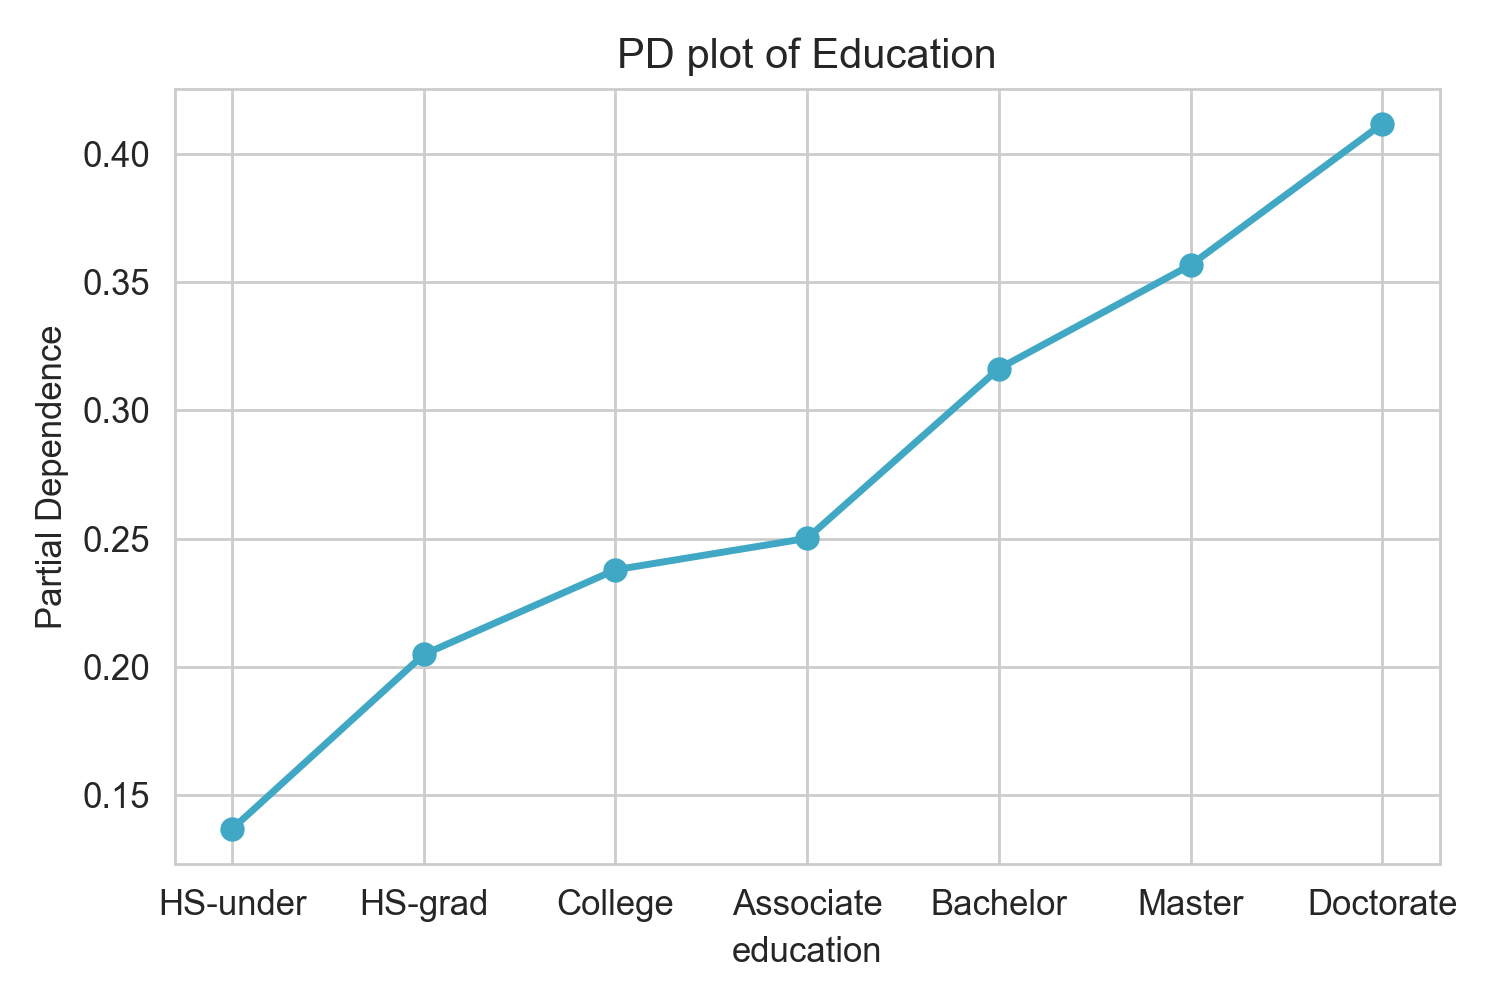

In [158]:
x = feature_info['category']
prob = list(pdp[0])

plt.subplots(figsize=(6,4))
plt.plot(x, prob, linewidth=2, marker='o', color='#40a8c4')
plt.title('PD plot of Education')
plt.ylabel('Partial Dependence')
plt.xlabel('education')
plt.tight_layout()

## (3) capital.gain

In [159]:
pdp, axes = partial_dependence(cb, X_train, [8])

<IPython.core.display.Javascript object>


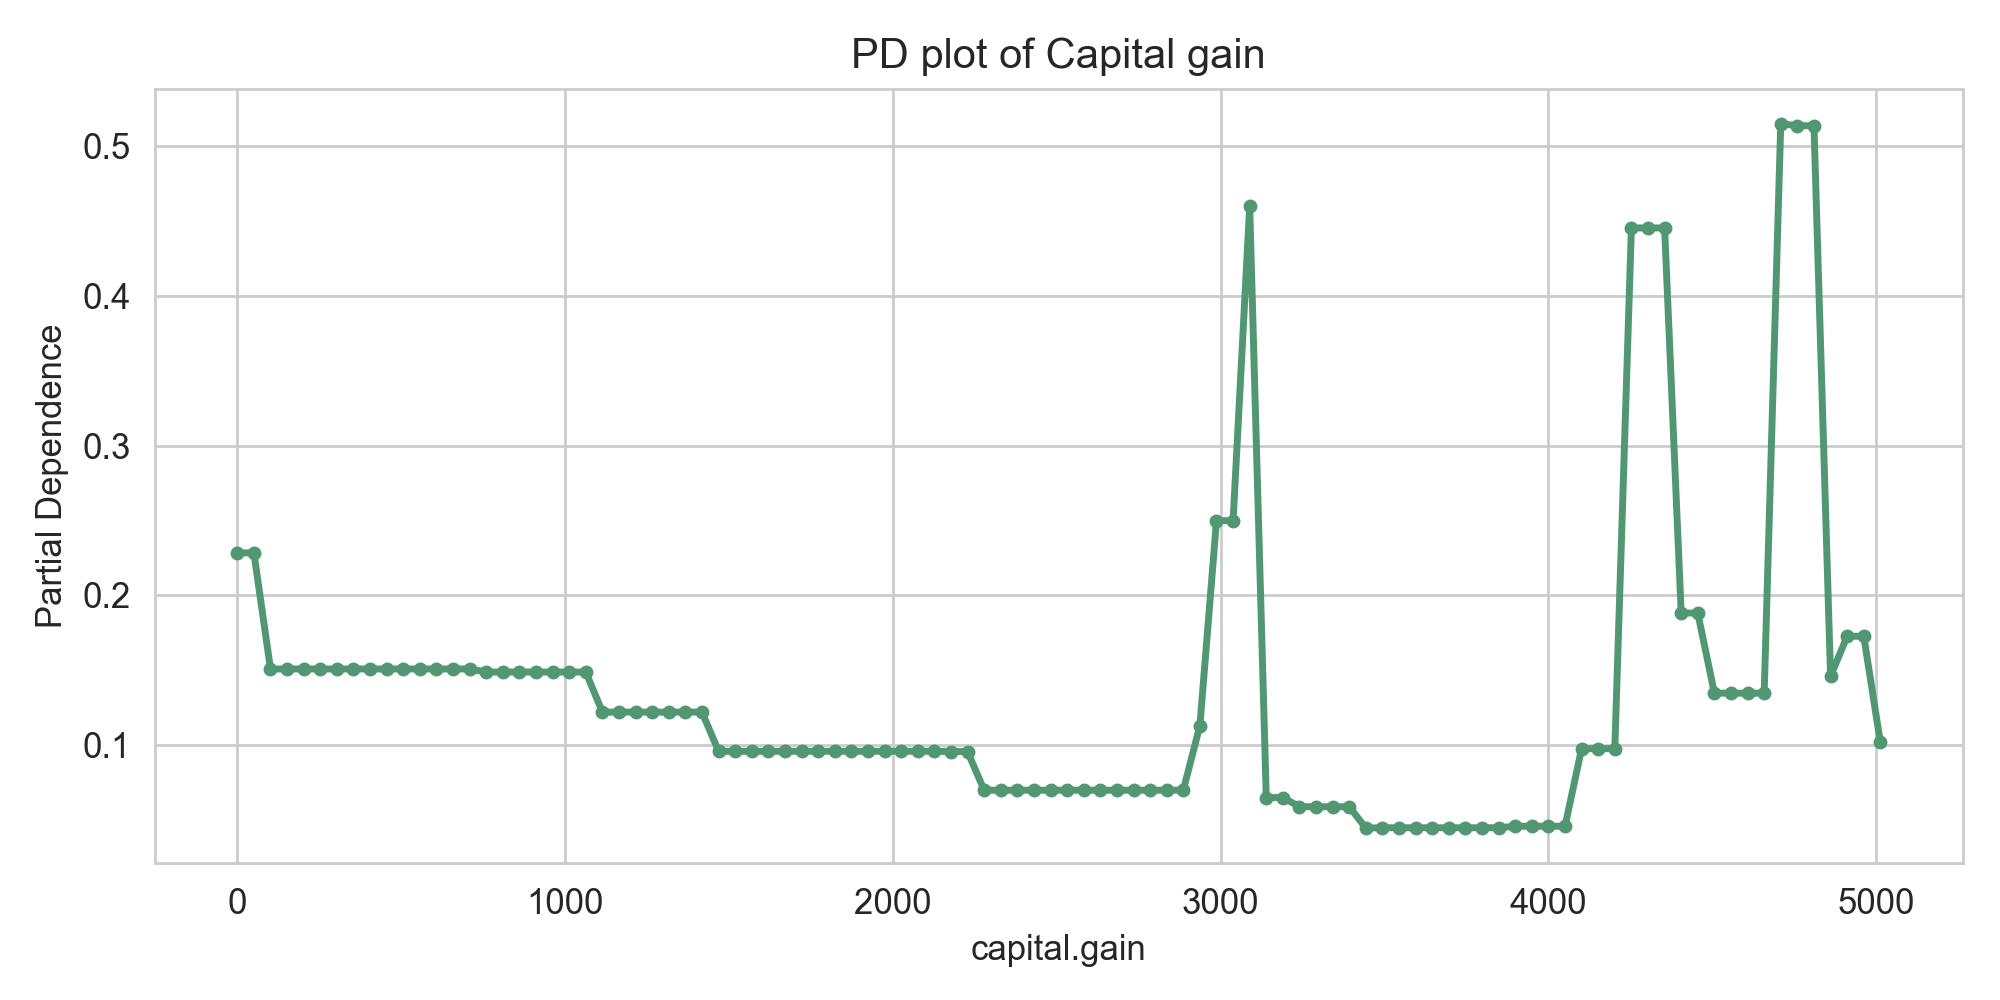

In [161]:
x = axes[0]
prob = list(pdp[0])

plt.subplots(figsize=(8,4))
plt.plot(x, prob, linewidth=2, marker='.', color='#519872')
plt.title('PD plot of Capital gain')
plt.ylabel('Partial Dependence')
plt.xlabel('capital.gain')
plt.tight_layout()

## Two-way PDP plot

In [18]:
feature_index = [3, 2]
feature_name = X_train.columns[feature_index]
print(feature_name)

Index(['marital.status', 'education.num'], dtype='object')


<IPython.core.display.Javascript object>


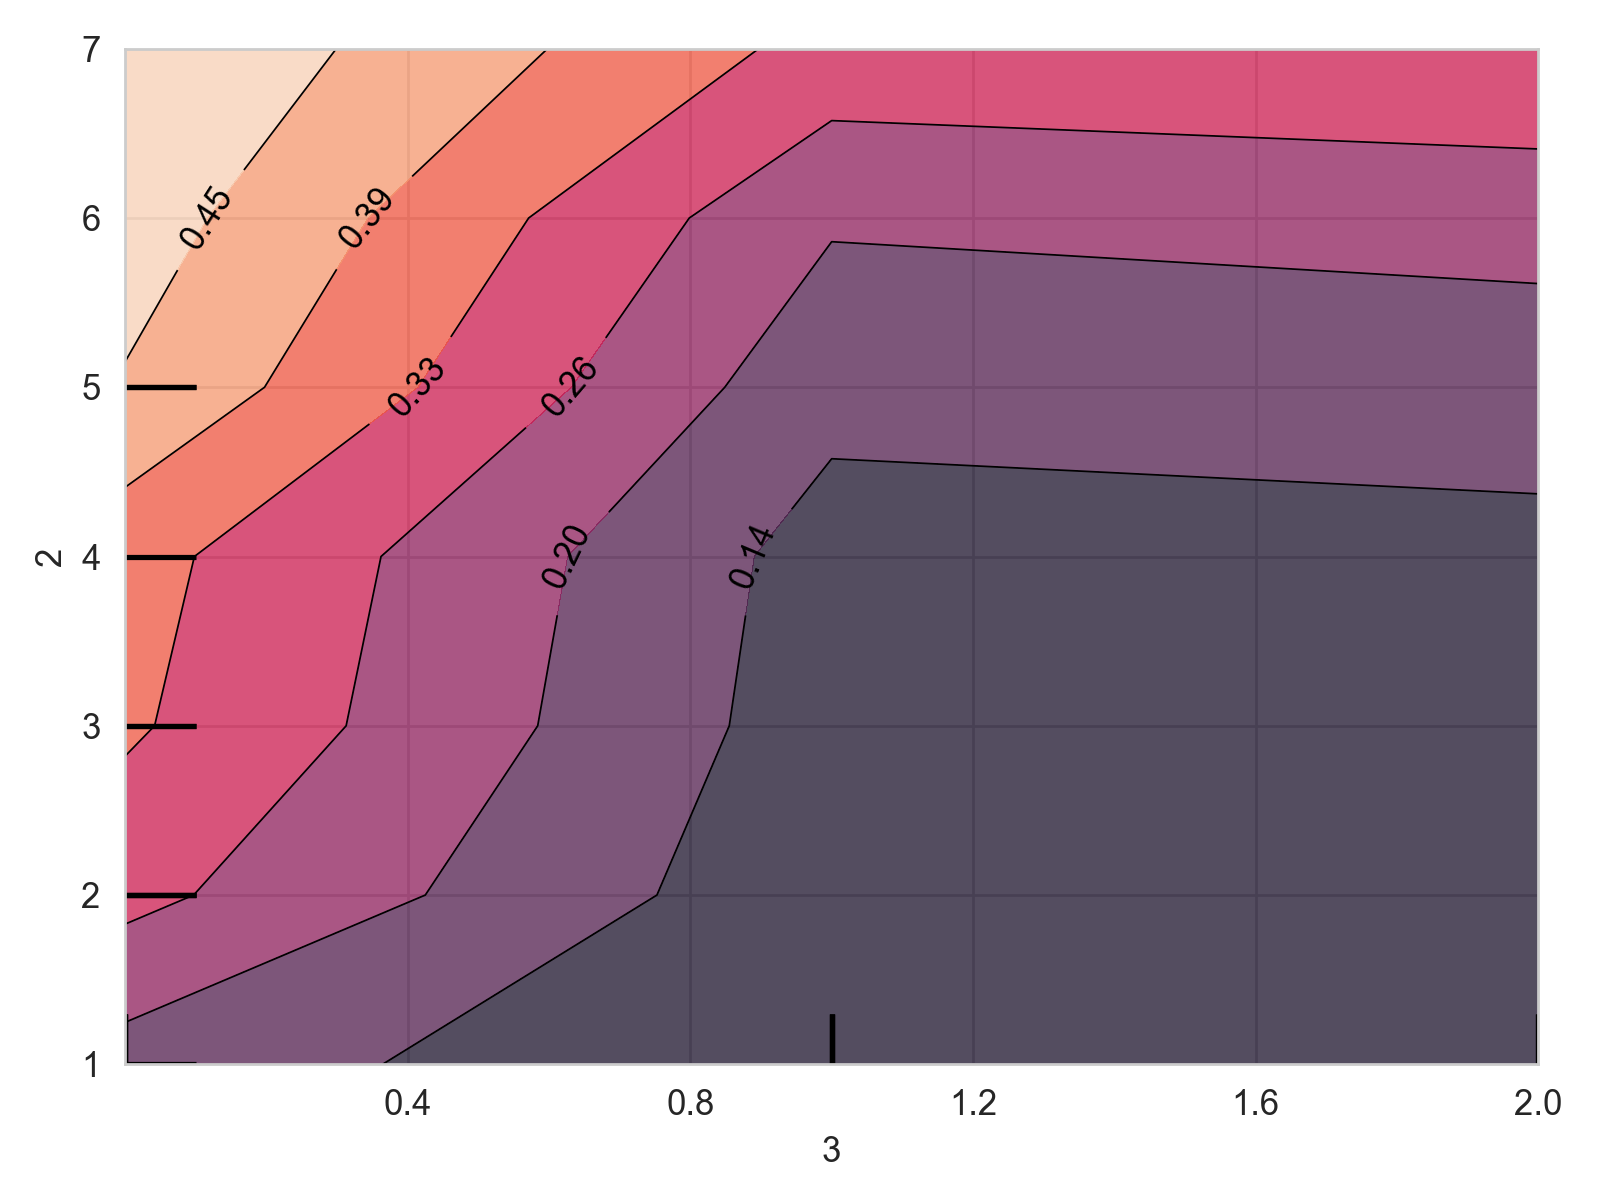

In [11]:
plot_partial_dependence(cb, features=[(3,2)], X=X_train)
plt.tight_layout()